This is where I am planning the ananlysis of the Education Library data set. I'll make a mark-down comment block with each of my questions/hypotheses and then we will find the answers and graph the results. This analysis will focus on how often books have circulated. 

Let's set up our imports and open up the file and read out all the column titles for easy reference


In [46]:
##all my imports are up here
import pandas as pd 
import matplotlib.pyplot as plt
import string
from datetime import datetime

#open file
file_name="Education_Library.xlsx"
data=pd.read_excel(file_name)

#list columns for easy reference
print(data.columns.tolist())

['Catalog Format', 'Catalog Id', 'Catalog Flex Id', 'Catalog Created Date', 'Catalog Created Year', 'Catalog Author', 'Catalog Title', 'Item Call Number', 'Item Shelving Id', 'Item Barcode', 'Item Collection', 'Item Id', 'Item Category1', 'Item Type', 'Item Last Activity Year', 'Item Last Checkout Year', 'Item Library Desc', 'Item Library Code', 'Item Status', 'Item Stat Period Checkouts', 'Total Lifetime Circulation']


What is the average amount of time since a book has been checked out? Make a histogram of how many years it has been since each book was checked out. (<1 years, <2 years, etc). So subtract last active year from current year. check for any invalid (negative) values and print out an eorror message with the book info is that is the case. Otherwise put the differences in a histogram. 

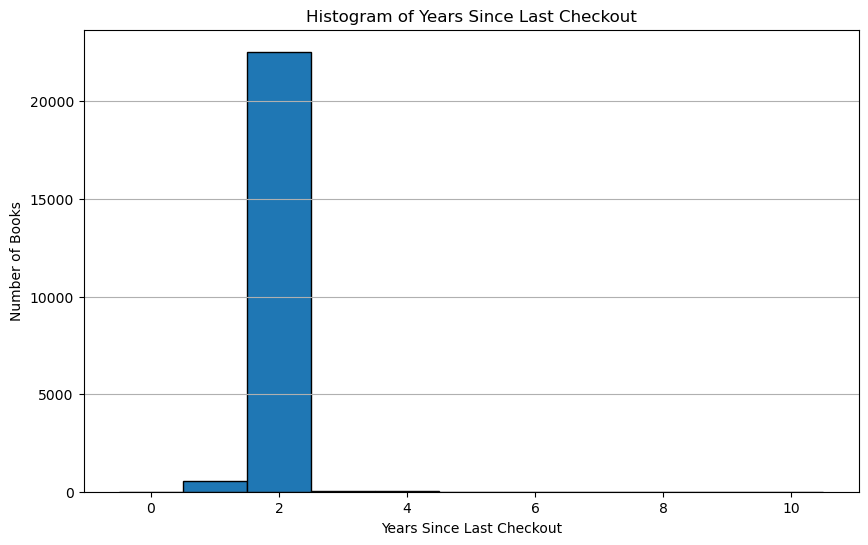

In [47]:
#Make sure values are numeric (see lower down for NaN values)
data['Item Last Checkout Year'] = pd.to_numeric(data['Item Last Checkout Year'], errors='coerce')
current_year= datetime.now().year

# Calculate years since last checkout
data['Years Since Last Checkout'] = current_year - data['Item Last Checkout Year']

# Check for invalid (negative) values
invalid_entries = data[data['Years Since Last Checkout'] < 0] ##return true/false

if not invalid_entries.empty:
        # Print error message with book info for invalid entries
        print("Invalid entries found where the last checkout year is in the future:")
        print(invalid_entries[['Catalog Title', 'Item Last Checkout Year']])
else:
        # Plot the histogram for valid entries
        valid_data = data[data['Years Since Last Checkout'] >= 0]

        plt.figure(figsize=(10, 6))
        plt.hist(valid_data['Years Since Last Checkout'], bins=range(0, 12), edgecolor='black', align='left')
        plt.title('Histogram of Years Since Last Checkout')
        plt.xlabel('Years Since Last Checkout')
        plt.ylabel('Number of Books')
        plt.grid(axis='y')
        plt.show()

##This is a really interesting result! a huge proportion of books have been checked out in the last two years. 
##Definitely one of the more active library collections

In [ ]:
What percentage of books have never been checked out?

In [48]:
##We will take any empty or NaN value to mean the book has not been checked out
##identify entries with NaN or missing 'Item Last Checkout Year'
never_checked_out = data[data['Item Last Checkout Year'].isna()]

# Count the number of books never checked out
never_checked_out_count = never_checked_out.shape[0]

# Print the results
print(f"Number of books that have never been checked out: {never_checked_out_count}")
if never_checked_out_count > 0:
    print("Details of books never checked out:")
    print(never_checked_out[['Catalog Title', 'Catalog Author', 'Item Barcode']])

##Great, as I sort of expected, all of the books in the data set have been checked out at some point in 2000-2024

Number of books that have never been checked out: 0


What percentage of the collection has ciruclated in the last 1, 5, 10, and 20 years? let's make a little bar graph of what percentage of the books have been checked out in that time frame. So after i answered the previous questions it turns out this wasn't a super interesting. We can pretty easily see from our histogram that most books have circualted in the last 2-3 years and we confirmed all books have been checked out at some point. 

Let's adapt to a sligtly different question. What book went the longest without being checked out? largest difference in years between last active year and item created date. I want to print a statement saying like "Book Title went 7 years without being checked out"

In [49]:
# Make numeric and find differences
data['Item Last Activity Year'] = pd.to_numeric(data['Item Last Activity Year'], errors='coerce')
data['Catalog Created Year'] = pd.to_numeric(data['Catalog Created Year'], errors='coerce')
data['Years Without Checkout'] = data['Item Last Activity Year'] - data['Catalog Created Year']
# Find the largest gap
longest_gap = data['Years Without Checkout'].max()
longest_gap_book = data[data['Years Without Checkout'] == longest_gap]
# Get Book
title = longest_gap_book.iloc[0]['Catalog Title']
gap_years = int(longest_gap)
print(f"'{title}' went {gap_years} years without being checked out.")


##I'm going to check that this is valid by verifying the catalog does go back at least 34 years
data['Catalog Created Year'] = pd.to_numeric(data['Catalog Created Year'], errors='coerce')
oldest_creation_year = data['Catalog Created Year'].min()
print(f"The oldest catalog creation year in the dataset is: {oldest_creation_year}")

#1989 was 34 years ago, so a book was checked out this year that had been there since 1989, so all checks out!

'Success and understanding /' went 34 years without being checked out.
The oldest catalog creation year in the dataset is: 1989


How many books have been checked out 0, 1, 2, 3, 4, 5, or 5+ times? make a pie chart sorting the books into these categories.

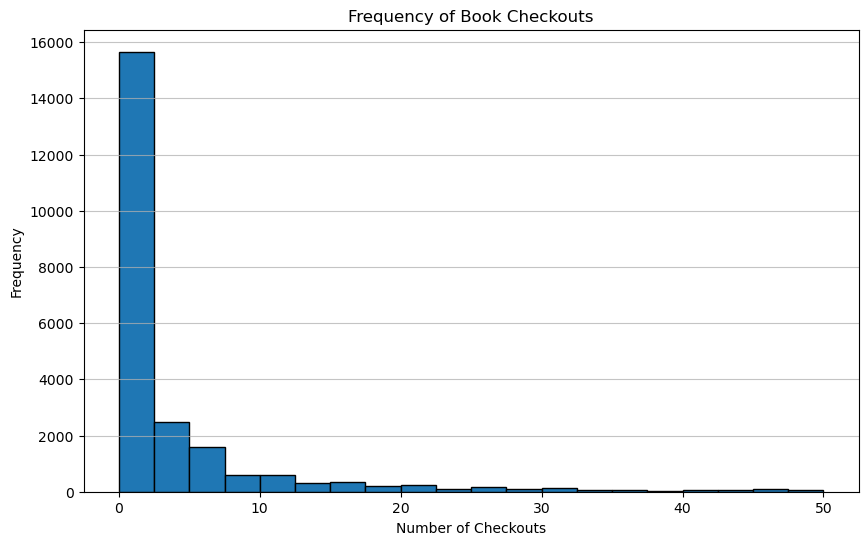

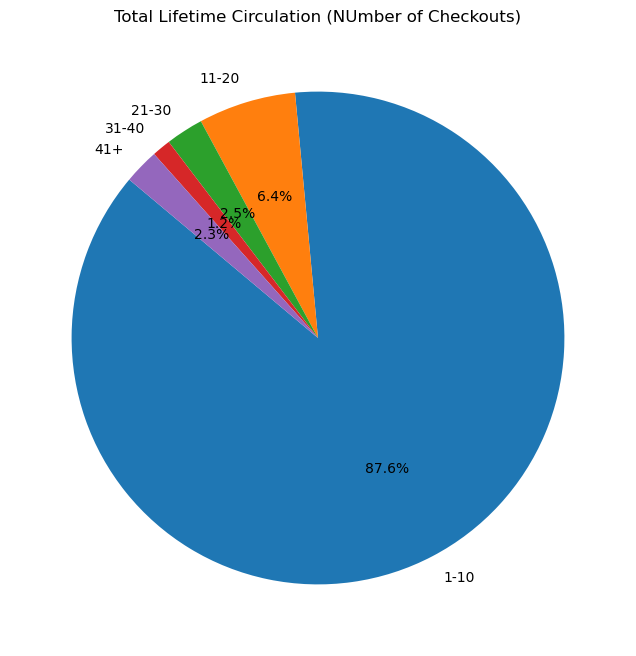

In [50]:
#so first I actually decided to put this in a histogram for easier reading. this shows that a lot of books are checked out pretty often!
#here's the code for that

data['Total Lifetime Circulation'] = pd.to_numeric(data['Total Lifetime Circulation'], errors='coerce').fillna(0)

plt.figure(figsize=(10, 6))
plt.hist(data['Total Lifetime Circulation'], range=(0, 50),bins=20, edgecolor='black')  # Adjust bins for granularity
plt.title('Frequency of Book Checkouts')
plt.xlabel('Number of Checkouts')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()

#Next I want to do the same data but in a pie chart. 
#It seems like better bins for our pie chart would be 0-10, 11-20, 21-30, 31-40, and 40+

# Define bins and labels
bins = [0, 10, 20, 30, 40, float('inf')]
labels = ['1-10', '11-20', '21-30', '31-40', '41+'] ##We can label the section 1-10 since we already showed there are no books with value 0, communicates slightly clearer

# Categorize data into bins
data['Circulation Range'] = pd.cut(data['Total Lifetime Circulation'], bins=bins, labels=labels, right=False)
bin_counts = data['Circulation Range'].value_counts(sort=False)

# Plot pie with bins
plt.figure(figsize=(8, 8))
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Lifetime Circulation (NUmber of Checkouts)')
plt.show()

What are the top 10 most circulated books in the data base? Do any of those 10 books have the same author? What is the average year of publication for these top 10 books?

In [51]:
#Check data validity (all numbers in this case)
data['Total Lifetime Circulation'] = pd.to_numeric(data['Total Lifetime Circulation'], errors='coerce').fillna(0)

# Sort the DataFrame by 'Total Lifetime Circulation' in descending order, get top 10
top_books = data[['Catalog Title', 'Catalog Author', 'Total Lifetime Circulation']].sort_values(
    by='Total Lifetime Circulation', ascending=False).head(10)

# Print the top 10 books 
# I initially tried just print, but it came out really ugly so let's apply some formatting
#print(top_books)

for _, row in top_books.iterrows():
    print(f" {row['Catalog Title']} authored by {row['Catalog Author']} with TLC: {row['Total Lifetime Circulation']}")

#That's a bit better, we see that the title "Fateful choices : the future of the U.S. academic research enterprise : a discussion paper"
#has been checked out more than twice as much as any other book in the collection. Impressive!

##Do any of these 10 books have the same author? by inspection, the answer is no

##What is average year of publication of these 10 books?
# Extract the 'Catalog Created Year' column for the top 10 books
top_books['Catalog Created Year'] = data.loc[top_books.index, 'Catalog Created Year']

# Ensure 'Catalog Created Year' is numeric and not missing
top_books['Catalog Created Year'] = pd.to_numeric(top_books['Catalog Created Year'], errors='coerce').fillna(0)

# Calculate the average
average_year = top_books['Catalog Created Year'].mean()
print(f"The average year of publication for the top 10 books is: {average_year:.2f}")

#kind of surprising result! the average is 1993, pretty old, this makes our next question even more relevant

 Fateful choices : the future of the U.S. academic research enterprise : a discussion paper / authored by nan with TLC: 623
 The reconstruction of education : quality, equality and control / authored by nan with TLC: 303
 Turning back the tide of illiteracy / authored by Hoerl, Marguerite Field. with TLC: 303
 Crucial issues in testing, authored by Tyler, Ralph W. (Ralph Winfred), with TLC: 303
 Looking together at student work : a companion guide to assessing student learning / authored by Blythe, Tina, with TLC: 302
 Constraints on teachers' classroom effectiveness / authored by nan with TLC: 302
 Raising standards for American education : a report to Congress, the Secretary of Education, the National Education Goals Panel, and the American people / authored by National Council on Education Standards and Testing (U.S.) with TLC: 302
 Schooling in a corporate society : the political economy of education in America / authored by Carnoy, Martin. with TLC: 302
 Behavior management in the

Are newer books checked out more freuqeuntly? Make a 2D plot showing cat creat year vs. avg number of check outs per year for each book. Maybe fit it with a linear regression or something.

Total rows in the dataset: 23257
Missing 'Catalog Created Year': 0
Invalid 'Catalog Created Year' (<= 0): 0
Missing 'Total Lifetime Circulation': 0
Missing 'Years Since Publication': 0
Missing 'Average Checkouts Per Year': 0
Total points in the histogram: 23257


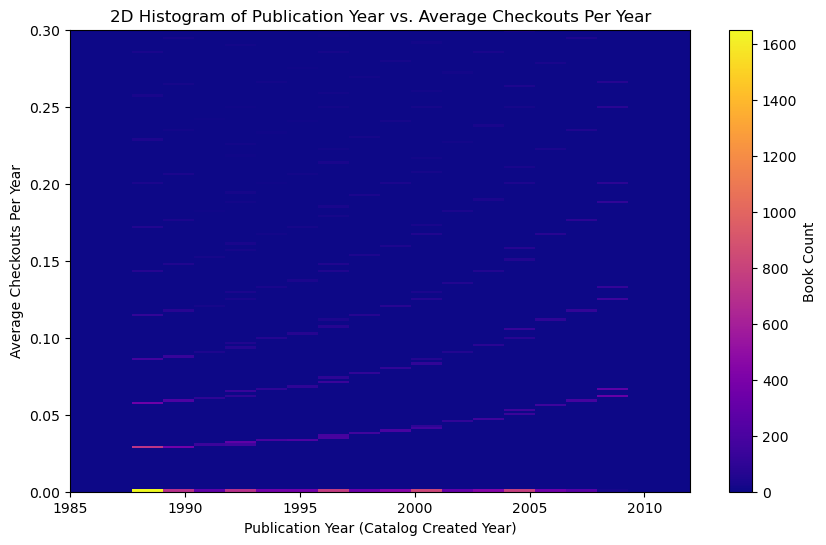

In [96]:
#Start with finding average number of checkouts for each book 
#Pick the columns we need and ensure numeric
data['Catalog Created Year'] = pd.to_numeric(data['Catalog Created Year'], errors='coerce').fillna(0)
data['Total Lifetime Circulation'] = pd.to_numeric(data['Total Lifetime Circulation'], errors='coerce').fillna(0)

# Calculate difference
current_year = datetime.now().year
data['Years Since Publication'] = current_year - data['Catalog Created Year']

# Check validity
data.loc[data['Years Since Publication'] <= 0, 'Years Since Publication'] = float('nan')

# Divide
data['Average Checkouts Per Year'] = data['Total Lifetime Circulation'] / data['Years Since Publication']

#Time to put this all in a histogram
# I was having some issues getting all the data into my histogram
#These print statements are from me dubugging that. As you can see my histogram now has plenty of points!
print(f"Total rows in the dataset: {len(data)}")
print(f"Missing 'Catalog Created Year': {data['Catalog Created Year'].isna().sum()}")
print(f"Invalid 'Catalog Created Year' (<= 0): {(data['Catalog Created Year'] <= 0).sum()}")
print(f"Missing 'Total Lifetime Circulation': {data['Total Lifetime Circulation'].isna().sum()}")
print(f"Missing 'Years Since Publication': {data['Years Since Publication'].isna().sum()}")
print(f"Missing 'Average Checkouts Per Year': {data['Average Checkouts Per Year'].isna().sum()}")

# Filter valid data for the histogram
valid_data = data.dropna(subset=['Catalog Created Year', 'Average Checkouts Per Year'])

# Extract columns for plot
publication_years = valid_data['Catalog Created Year']
avg_checkouts_per_year = valid_data['Average Checkouts Per Year']
# Verify the number of points in the histogram
print(f"Total points in the histogram: {len(valid_data)}")


# Set axes ranges (editted these a lot to adjust)
publication_year_range = [1985, 2012]  
avg_checkouts_range = [0, 0.3]

# Plot the 2D histogram, specify data, bins, cmap, range
plt.figure(figsize=(10, 6))
plt.hist2d(publication_years, avg_checkouts_per_year, bins=[20, 200], cmap='plasma', range=[publication_year_range, avg_checkouts_range])
plt.colorbar(label='Book Count')

# Add labels and title
plt.xlabel('Publication Year (Catalog Created Year)')
plt.ylabel('Average Checkouts Per Year')
plt.title('2D Histogram of Publication Year vs. Average Checkouts Per Year')

plt.show()


